In [1]:
!pip install memory_profiler
!pip install scipy
import numpy as np
import tracemalloc
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

from memory_profiler import profile


from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import johnson


[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
# generate a directed graph with negative weights

def graph(v,e,right):
  num_vertices = v
  num_edges = e
  kolichestvo_negative_weights=0

  g = [[0] * num_vertices for i in range(num_vertices)]
  edges_generated = 0
  while edges_generated < num_edges:
      vertex1 = random.randint(0, num_vertices - 1)
      vertex2 = random.randint(0, num_vertices - 1)

      if vertex1 != vertex2 and g[vertex1][vertex2] == 0:

          g[vertex1][vertex2] = random.randint(-1,right)
          if g[vertex1][vertex2] == -1:
            kolichestvo_negative_weights+=1
          edges_generated += 1
  adj_mtrx=np.array([np.array(xi) for xi in g])
  return g

# kolichestvo_negative_weights

In [13]:
g = graph(100,500,10)

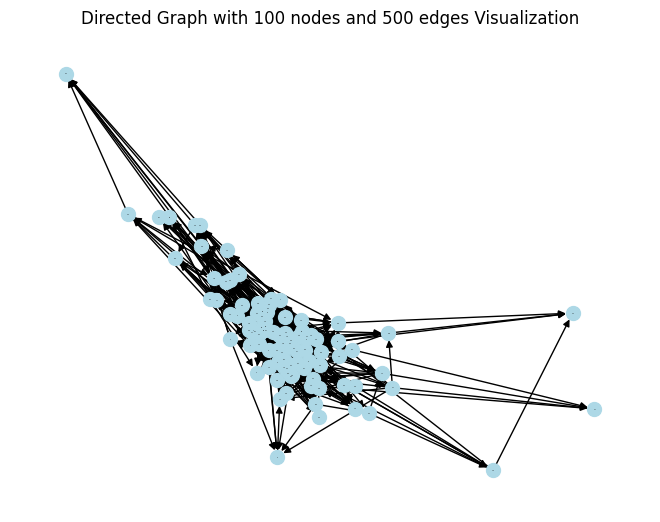

In [14]:
# Define the adjacency matrix as a 2D numpy array
# The (i, j)-th element in the array represents an edge from node i to node j
adjacency_matrix = np.array(g)

# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adjacency_matrix)

# Draw the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms

# You can customize the visualization as needed
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=1, font_color='black')
# nx.draw_networkx_edge_labels(G, pos,  font_color='red')
plt.title("Directed Graph with 100 nodes and 500 edges Visualization")
plt.show()

In [15]:
# Johnson algorithm results
def johnson_alg(g):
  graph = csr_matrix(g)
  dist_matrix, predecessors = johnson(csgraph=graph, directed=True, return_predecessors=True)
  return dist_matrix
johnson_alg(g)

array([[ 0., -1.,  6., ...,  5.,  5., -2.],
       [ 9.,  0.,  8., ...,  7.,  7.,  1.],
       [ 9.,  2.,  0., ..., -1.,  4.,  1.],
       ...,
       [10.,  3., 10., ...,  0.,  7.,  2.],
       [ 8.,  7., 14., ..., 13.,  0.,  6.],
       [ 9.,  1.,  8., ...,  7.,  8.,  0.]])

In [16]:
# Floyd-Warshall algorithm 

def floyd_warshall(graph):
    num_vertices = len(graph)
    dist = [[float('inf') if i != j else 0 for j in range(num_vertices)] for i in range(num_vertices)]

    for u in range(num_vertices):
        for v in range(num_vertices):
            if graph[u][v] != 0:
                dist[u][v] = graph[u][v]

    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][k] != float('inf') and dist[k][j] != float('inf') and dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist


# Run the Floyd-Warshall algorithm
shortest_distances = floyd_warshall(adjacency_matrix)

np.array(shortest_distances)

array([[ 0., -1.,  6., ...,  5.,  5., -2.],
       [ 9.,  0.,  8., ...,  7.,  7.,  1.],
       [ 9.,  2.,  0., ..., -1.,  4.,  1.],
       ...,
       [10.,  3., 10., ...,  0.,  7.,  2.],
       [ 8.,  7., 14., ..., 13.,  0.,  6.],
       [ 9.,  1.,  8., ...,  7.,  8.,  0.]])

In [17]:
def timer(g,func):
    avg = 0
    for i in range(10):
      start_time = time.time()  # Record start time
      func(g)
      end_time = time.time()  # Record end time
      avg += end_time - start_time
    return avg/10

In [33]:
g = graph(100,100,1000)
avg = timer(g,johnson_alg)
print(f'Average Johnson time on graph with 100 edges: {avg}')
avg = timer(g,floyd_warshall)
print(f'Average Floyd-Warshall time on graph with 100 edges: {avg}')

g = graph(100,1000,1000)
avg = timer(g,johnson_alg)
print(f'Average Johnson time on graph with 1000 edges: {avg}')
avg = timer(g,floyd_warshall)
print(f'Average Floyd-Warshall time on graph with 1000 edges: {avg}')

g = graph(100,9800,1000)
avg = timer(g,johnson_alg)
print(f'Average Johnson time on graph with 9800 edges: {avg}')
avg = timer(g,floyd_warshall)
print(f'Average Floyd-Warshall time on graph with 9800 edges: {avg}')

Average Johnson time on graph with 100 edges: 0.001950216293334961
Average Floyd-Warshall time on graph with 100 edges: 0.0649566411972046
Average Johnson time on graph with 1000 edges: 0.00287775993347168
Average Floyd-Warshall time on graph with 1000 edges: 0.1789612054824829
Average Johnson time on graph with 9800 edges: 0.006620287895202637
Average Floyd-Warshall time on graph with 9800 edges: 0.194992995262146


In [34]:
from fancy import johnson_space
from fancy import floyd_warshall_space

In [35]:
# 100 edges

g = graph(100,100,1000)
print('Memory usage of Johnson with 100 edges:')
%load_ext memory_profiler
%mprun -f  johnson_space johnson_space(g)

Memory usage of Johnson with 100 edges:
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: /Users/polina/Desktop/pythonProject/fancy.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6     44.1 MiB     44.1 MiB           1   @profile
     7                                         def johnson_space(g):
     8     44.1 MiB      0.0 MiB           1     graph = csr_matrix(g)
     9     44.2 MiB      0.1 MiB           1     dist_matrix, predecessors = johnson(csgraph=graph, directed=True, return_predecessors=True)
    10     44.2 MiB      0.0 MiB           1     return dist_matrix





Filename: /Users/polina/Desktop/pythonProject/venv/lib/python3.11/site-packages/memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185     44.1 MiB     44.1 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187     44.1 MiB      0.0 MiB           1                   prof = get_prof()
  1188     44.2 MiB      0.1 MiB           1                   val = prof(func)(*args, **kwargs)
  1189     44.2 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190     44.2 MiB      0.0 MiB           1                   return val

In [36]:
print('Memory usage of Floyd-Warshall with 100 edges:')
%load_ext memory_profiler
%mprun -f  floyd_warshall_space floyd_warshall_space(g)

Memory usage of Floyd-Warshall with 100 edges:
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: /Users/polina/Desktop/pythonProject/fancy.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    12     44.3 MiB     44.3 MiB           1   @profile
    13                                         def floyd_warshall_space(graph):
    14     44.3 MiB      0.0 MiB           1       num_vertices = len(graph)
    15     44.3 MiB      0.0 MiB       10303       dist = [[float('inf') if i != j else 0 for j in range(num_vertices)] for i in range(num_vertices)]
    16                                         
    17     44.3 MiB      0.0 MiB         101       for u in range(num_vertices):
    18     44.3 MiB      0.0 MiB       10100           for v in range(num_vertices):
    19     44.3 MiB      0.0 MiB       10000               if graph[u][v] != 0:
    20     44.3 MiB      0.0 MiB         100                   dist[u][v] = grap

Filename: /Users/polina/Desktop/pythonProject/venv/lib/python3.11/site-packages/memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185     44.3 MiB     44.3 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187     44.3 MiB      0.0 MiB           1                   prof = get_prof()
  1188     44.3 MiB     -0.0 MiB           1                   val = prof(func)(*args, **kwargs)
  1189     44.3 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190     44.3 MiB      0.0 MiB           1                   return val

In [37]:
# 1000 edges

g = graph(100,1000,1000)
print('Memory usage of Johnson with 1000 edges:')
%load_ext memory_profiler
%mprun -f  johnson_space johnson_space(g)

Memory usage of Johnson with 1000 edges:
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: /Users/polina/Desktop/pythonProject/fancy.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6     44.8 MiB     44.8 MiB           1   @profile
     7                                         def johnson_space(g):
     8     44.8 MiB      0.0 MiB           1     graph = csr_matrix(g)
     9     44.8 MiB      0.0 MiB           1     dist_matrix, predecessors = johnson(csgraph=graph, directed=True, return_predecessors=True)
    10     44.8 MiB      0.0 MiB           1     return dist_matrix





Filename: /Users/polina/Desktop/pythonProject/venv/lib/python3.11/site-packages/memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185     44.4 MiB     44.4 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187     44.4 MiB      0.0 MiB           1                   prof = get_prof()
  1188     44.8 MiB      0.4 MiB           1                   val = prof(func)(*args, **kwargs)
  1189     44.8 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190     44.8 MiB      0.0 MiB           1                   return val

In [38]:
print('Memory usage of Floyd-Warshall with 1000 edges:')
%load_ext memory_profiler
%mprun -f  floyd_warshall_space floyd_warshall_space(g)

Memory usage of Floyd-Warshall with 1000 edges:
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: /Users/polina/Desktop/pythonProject/fancy.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    12     44.9 MiB     44.9 MiB           1   @profile
    13                                         def floyd_warshall_space(graph):
    14     44.9 MiB      0.0 MiB           1       num_vertices = len(graph)
    15     44.9 MiB      0.0 MiB       10303       dist = [[float('inf') if i != j else 0 for j in range(num_vertices)] for i in range(num_vertices)]
    16                                         
    17     44.9 MiB      0.0 MiB         101       for u in range(num_vertices):
    18     44.9 MiB      0.0 MiB       10100           for v in range(num_vertices):
    19     44.9 MiB      0.0 MiB       10000               if graph[u][v] != 0:
    20     44.9 MiB      0.0 MiB        1000                   dist[u][v] = gra

Filename: /Users/polina/Desktop/pythonProject/venv/lib/python3.11/site-packages/memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185     44.9 MiB     44.9 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187     44.9 MiB      0.0 MiB           1                   prof = get_prof()
  1188     27.9 MiB    -17.0 MiB           1                   val = prof(func)(*args, **kwargs)
  1189     28.4 MiB      0.5 MiB           1                   show_results_bound(prof)
  1190     28.4 MiB      0.0 MiB           1                   return val

In [39]:
# 9800 edges

g = graph(100,9800,1000)
print('Memory usage of Johnson with 1000 edges:')
%load_ext memory_profiler
%mprun -f  johnson_space johnson_space(g)

Memory usage of Johnson with 1000 edges:
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: /Users/polina/Desktop/pythonProject/fancy.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     6     37.0 MiB     37.0 MiB           1   @profile
     7                                         def johnson_space(g):
     8     38.9 MiB      1.8 MiB           1     graph = csr_matrix(g)
     9     39.3 MiB      0.5 MiB           1     dist_matrix, predecessors = johnson(csgraph=graph, directed=True, return_predecessors=True)
    10     39.3 MiB      0.0 MiB           1     return dist_matrix





Filename: /Users/polina/Desktop/pythonProject/venv/lib/python3.11/site-packages/memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185     36.7 MiB     36.7 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187     36.7 MiB      0.0 MiB           1                   prof = get_prof()
  1188     39.3 MiB      2.6 MiB           1                   val = prof(func)(*args, **kwargs)
  1189     39.4 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190     39.4 MiB      0.0 MiB           1                   return val

In [40]:
print('Memory usage of Floyd-Warshall with 1000 edges:')
%load_ext memory_profiler
%mprun -f  floyd_warshall_space floyd_warshall_space(g)

Memory usage of Floyd-Warshall with 1000 edges:
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
Filename: /Users/polina/Desktop/pythonProject/fancy.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    12     39.6 MiB     39.6 MiB           1   @profile
    13                                         def floyd_warshall_space(graph):
    14     39.6 MiB      0.0 MiB           1       num_vertices = len(graph)
    15     39.8 MiB      0.2 MiB       10303       dist = [[float('inf') if i != j else 0 for j in range(num_vertices)] for i in range(num_vertices)]
    16                                         
    17     39.8 MiB      0.0 MiB         101       for u in range(num_vertices):
    18     39.8 MiB      0.0 MiB       10100           for v in range(num_vertices):
    19     39.8 MiB      0.0 MiB       10000               if graph[u][v] != 0:
    20     39.8 MiB      0.0 MiB        9787                   dist[u][v] = gra

Filename: /Users/polina/Desktop/pythonProject/venv/lib/python3.11/site-packages/memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1185     39.6 MiB     39.6 MiB           1               @wraps(wrapped=func)
  1186                                                     def wrapper(*args, **kwargs):
  1187     39.6 MiB      0.0 MiB           1                   prof = get_prof()
  1188     39.8 MiB      0.2 MiB           1                   val = prof(func)(*args, **kwargs)
  1189     39.8 MiB      0.0 MiB           1                   show_results_bound(prof)
  1190     39.8 MiB      0.0 MiB           1                   return val